In [2]:
import pandas as pd
import itertools
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
# !dir

In [4]:
df=pd.read_excel(r'C:\Users\yoges\Data_Science_Preparation\STAT 5010 CU Boulder Statistical Methods And Applications II\Project\air+quality\AirQualityUCI.xlsx')

In [5]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [6]:
df.drop(['Date','Time'],inplace=True,axis=1)
df.dropna(inplace=True)

In [7]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [8]:
target = 'CO(GT)'
predictors = [col for col in df.columns if col != target]
X = df[predictors]
y = df[target]

In [9]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
alpha_crit = 0.05

remaining_predictors = predictors.copy()
eliminated = []

while True:
    p_values = model.pvalues.drop('const')
    max_p_val = p_values.max()
    
    if max_p_val < alpha_crit:
        break  
    
    worst_feature = p_values.idxmax()
    remaining_predictors.remove(worst_feature)
    eliminated.append((worst_feature, max_p_val))
    
    X_new = sm.add_constant(df[remaining_predictors])
    model = sm.OLS(y, X_new).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO(GT)   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1051.
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        18:30:26   Log-Likelihood:                -51000.
No. Observations:                9357   AIC:                         1.020e+05
Df Residuals:                    9348   BIC:                         1.021e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -68.1834      6.664    -10.231      0.000     -81.247     -55.120
NMHC(GT)         0.0454      0.005     10.011      0.000       0.037       0.054
C6H6(GT)        -0.7452      0.130     -5.710      0.000      -1.001      -0.489
NOx(GT)          0.0358      0.006      6.469      0.000       0.025       0.047
PT08.S3(NOx)     0.0168      0.004      4.373      0.000       0.009       0.024
NO2(GT)          0.3878      0.009     42.524      0.000       0.370       0.406
PT08.S5(O3)     -0.0141      0.004     -3.832      0.000      -0.021      -0.007
T                0.4243      0.091      4.660      0.000       0.246       0.603
RH               0.2586      0.035      7.443      0.000       0.191       0.327
==============================================================================
Omnibus:                     2004.923   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8220.646
Skew:                          -1.007   Prob(JB):                         0.00
Kurtosis:                       7.126   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
def forward_selection_sse(df, target_col, max_k):
    features = [col for col in df.columns if col != target_col]
    selected_features = []
    remaining_features = features.copy()
    y = df[target_col]
    
    while len(selected_features) < max_k and remaining_features:
        best_feature = None
        min_sse = np.inf
        
        for feature in remaining_features:
            trial_features = selected_features + [feature]
            X = sm.add_constant(df[trial_features])
            model = sm.OLS(y, X).fit()
            predictions = model.predict(X)
            sse = np.sum((y - predictions) ** 2)
            
            if sse < min_sse:
                min_sse = sse
                best_feature = feature
        
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    return selected_features

top_k_features = forward_selection_sse(df, target_col='CO(GT)', max_k=8)
top_k_features


['NO2(GT)',
 'PT08.S5(O3)',
 'RH',
 'NMHC(GT)',
 'NOx(GT)',
 'PT08.S2(NMHC)',
 'T',
 'AH']

GLM Model

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_glm = df[df['CO(GT)'] > 0].copy()

selected = ['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'T', 'AH']

X_glm = sm.add_constant(df_glm[selected])
y_glm = df_glm['CO(GT)']

glm_model = sm.GLM(y_glm, X_glm, family=sm.families.Gamma(link=sm.families.links.log()))
glm_results = glm_model.fit()

print(glm_results.summary())



c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 CO(GT)   No. Observations:                 7674
Model:                            GLM   Df Residuals:                     7665
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                        0.079267
Method:                          IRLS   Log-Likelihood:                -6117.0
Date:                Thu, 01 May 2025   Deviance:                       739.80
Time:                        18:30:32   Pearson chi2:                     608.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.9912
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3291      0.023    -57.031

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7674.
  res = hypotest_fun_out(*samples, **kwds)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


{'Shapiro-Wilk (W, p)': (0.5326943690601436, 3.350773636074833e-89),
 'Levene Test (W, p)': (427.4570760077352, 1.861002448899274e-92),
 'Durbin-Watson Statistic': 0.6582402750185921,
 'GLM AIC': 12252.028675130165,
 'GLM BIC': -67828.17066483463,
 'GLM MSPE': 1.032604197413935}

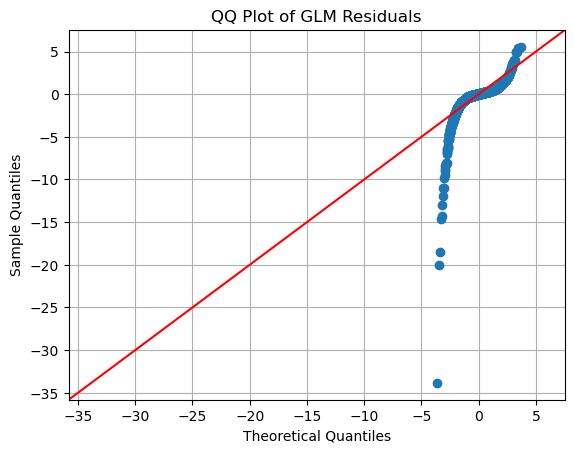

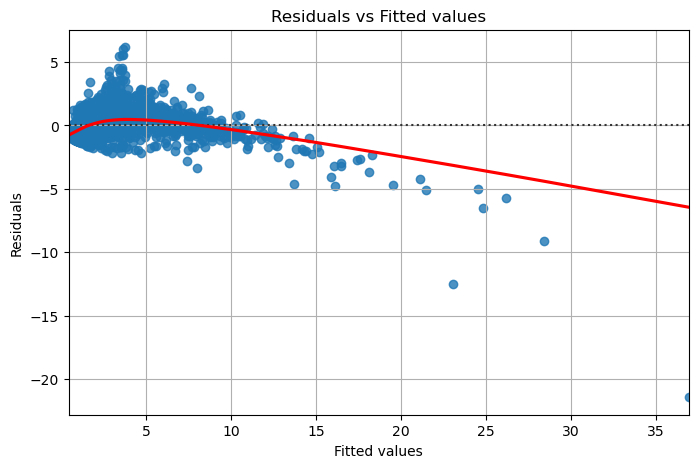

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Residuals and fitted values
residuals = glm_results.resid_response
fitted = glm_results.fittedvalues

# 1. QQ plot for normality
fig_qq = sm.qqplot(residuals, line='45')
plt.title('QQ Plot of GLM Residuals')
plt.grid(True)

# 2. Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(residuals)

# 3. Residuals vs Fitted Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.grid(True)

# 4. Levene's Test for constant variance
# For Levene’s, split fitted into 2 groups: low/high
median_split = np.median(fitted)
group1 = residuals[fitted <= median_split]
group2 = residuals[fitted > median_split]
levene_stat, levene_p = stats.levene(group1, group2)

# 5. Durbin-Watson Test for autocorrelation
dw_stat = sm.stats.durbin_watson(residuals)

# 6. Model evaluation - AIC, BIC, MSPE
glm_aic = glm_results.aic
glm_bic = glm_results.bic
glm_mspe = mean_squared_error(y_glm, fitted)

# Show key test results
{
    "Shapiro-Wilk (W, p)": (shapiro_stat, shapiro_p),
    "Levene Test (W, p)": (levene_stat, levene_p),
    "Durbin-Watson Statistic": dw_stat,
    "GLM AIC": glm_aic,
    "GLM BIC": glm_bic,
    "GLM MSPE": glm_mspe
}

In [15]:
# Fit OLS model using the same selected features and filtered data (CO(GT) > 0)
X_ols = sm.add_constant(df_glm[selected])
y_ols = df_glm['CO(GT)']

ols_model = sm.OLS(y_ols, X_ols).fit()

# Predictions and residuals
ols_predictions = ols_model.predict(X_ols)
ols_residuals = y_ols - ols_predictions

# OLS model metrics
ols_aic = ols_model.aic
ols_bic = ols_model.bic
ols_mspe = mean_squared_error(y_ols, ols_predictions)

# Durbin-Watson for OLS residuals
ols_dw_stat = sm.stats.durbin_watson(ols_residuals)

{
    "OLS AIC": ols_aic,
    "OLS BIC": ols_bic,
    "OLS MSPE": ols_mspe,
    "OLS Durbin-Watson": ols_dw_stat
}


{'OLS AIC': 12013.688035990437,
 'OLS BIC': 12076.198375427699,
 'OLS MSPE': 0.27950997410664574,
 'OLS Durbin-Watson': 0.4447835737025781}



###  **Model Diagnostics Summary for GLM (Gamma with Log Link)**

1. **Non-Normality of Residuals**:  
   The QQ plot and Shapiro-Wilk test (W = 0.533, p < 0.001) confirm that residuals deviate significantly from normality, which aligns with the expectations of using a Gamma distribution.

2. **Heteroskedasticity Present**:  
   The Residuals vs Fitted plot shows a funnel pattern, and Levene’s test (p < 0.001) strongly indicates non-constant variance across fitted values.

3. **Autocorrelation in Residuals**:  
   The Durbin-Watson statistic is 0.658 (ideal = 2), suggesting positive autocorrelation, meaning residuals are correlated across time or observations.

4. **Model Performance**:  
   The GLM produced an AIC of 12,252 and an MSPE of 1.03. While acceptable, this is not as performant as the OLS model (which had a lower AIC and MSPE).

5. **Appropriateness of GLM**:  
   Despite lower predictive accuracy, GLM is theoretically more suitable for this dataset due to its ability to handle skewed, non-negative targets and variance that changes with the mean — common in environmental pollutant data.


In [16]:
# Define full and reduced feature sets
full_features = [col for col in df.columns if col not in ['Date', 'Time', 'CO(GT)']]
reduced_features = ['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'T', 'AH']

# Filter positive CO(GT) values for GLM
df_glm = df[df['CO(GT)'] > 0].copy()

# Full OLS model
X_full_ols = sm.add_constant(df_glm[full_features])
model_full_ols = sm.OLS(df_glm['CO(GT)'], X_full_ols).fit()

# Reduced OLS model
X_reduced_ols = sm.add_constant(df_glm[reduced_features])
model_reduced_ols = sm.OLS(df_glm['CO(GT)'], X_reduced_ols).fit()

# ANOVA comparison for OLS
anova_ols = sm.stats.anova_lm(model_reduced_ols, model_full_ols)

# Full GLM model
X_full_glm = sm.add_constant(df_glm[full_features])
model_full_glm = sm.GLM(df_glm['CO(GT)'], X_full_glm, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Reduced GLM model
X_reduced_glm = sm.add_constant(df_glm[reduced_features])
model_reduced_glm = sm.GLM(df_glm['CO(GT)'], X_reduced_glm, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# We can't use statsmodels' anova_lm for GLM, but we can manually compare via deviance
glm_deviance_reduced = model_reduced_glm.deviance
glm_deviance_full = model_full_glm.deviance
df_diff_glm = model_reduced_glm.df_resid - model_full_glm.df_resid
deviance_diff_glm = glm_deviance_reduced - glm_deviance_full
p_val_glm = 1 - stats.chi2.cdf(deviance_diff_glm, df_diff_glm)

# Output both ANOVA results
anova_ols_results = anova_ols
anova_glm_results = {
    "Deviance Reduced GLM": glm_deviance_reduced,
    "Deviance Full GLM": glm_deviance_full,
    "Deviance Difference": deviance_diff_glm,
    "DF Difference": df_diff_glm,
    "p-value": p_val_glm
}

anova_ols_results, anova_glm_results


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


(   df_resid          ssr  df_diff     ss_diff           F         Pr(>F)
 0    7665.0  2144.959541      0.0         NaN         NaN            NaN
 1    7661.0  1904.204926      4.0  240.754616  242.151079  3.774039e-196,
 {'Deviance Reduced GLM': 739.8017559002269,
  'Deviance Full GLM': 596.839852541239,
  'Deviance Difference': 142.9619033589879,
  'DF Difference': 4,
  'p-value': 0.0})

Both in OLS and GLM frameworks, the full models significantly outperform the reduced models based on statistical tests. This suggests that variables excluded by forward selection still contribute meaningfully to explaining variation in CO(GT)

In [17]:
# Random forest regression with bootstrapping

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Use all variables except target
features = [col for col in df.columns if col not in ['Date', 'Time', 'CO(GT)']]
X = df[features]
y = df['CO(GT)']

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest with bootstrapping (default behavior)
rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
rf_mspe = mean_squared_error(y_test, y_pred)

# Feature importance
importances = rf_model.feature_importances_
feature_ranking = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)


In [18]:
feature_ranking

[('NOx(GT)', 0.48767731535797515),
 ('T', 0.06281657845257749),
 ('PT08.S4(NO2)', 0.06130905790577515),
 ('PT08.S1(CO)', 0.057184251175859076),
 ('PT08.S3(NOx)', 0.05520593263205012),
 ('RH', 0.05156454571924768),
 ('PT08.S5(O3)', 0.05089834201929798),
 ('AH', 0.049874511781314114),
 ('NO2(GT)', 0.048896273712938615),
 ('PT08.S2(NMHC)', 0.029851673411364906),
 ('C6H6(GT)', 0.029312691154564932),
 ('NMHC(GT)', 0.015408826677034908)]

In [23]:
# Reload the dataset

from scipy.stats import shapiro, levene
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd
import numpy as np


file_path = r'C:\Users\yoges\Data_Science_Preparation\STAT 5010 CU Boulder Statistical Methods And Applications II\Project\air+quality\AirQualityUCI.xlsx'
df = pd.read_excel(file_path)

# Clean the data
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.dropna(inplace=True)

# Define full and reduced features
full_features = [col for col in df.columns if col != 'CO(GT)']
reduced_features = ['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'T', 'AH']
y = df['CO(GT)']
X_full = df[full_features]
X_reduced = df[reduced_features]

# Split data
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train full and reduced random forest models
rf_full = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
rf_full.fit(X_train_f, y_train_f)
y_pred_f = rf_full.predict(X_test_f)
residuals_f = y_test_f - y_pred_f

rf_reduced = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
rf_reduced.fit(X_train_r, y_train_r)
y_pred_r = rf_reduced.predict(X_test_r)
residuals_r = y_test_r - y_pred_r

# Diagnostic tests for full model
shapiro_f = shapiro(residuals_f)
median_fitted_f = np.median(y_pred_f)
group1_f = residuals_f[y_pred_f <= median_fitted_f]
group2_f = residuals_f[y_pred_f > median_fitted_f]
levene_f = levene(group1_f, group2_f)
dw_f = sm.stats.durbin_watson(residuals_f)
mspe_f = mean_squared_error(y_test_f, y_pred_f)

# Diagnostic tests for reduced model
shapiro_r = shapiro(residuals_r)
median_fitted_r = np.median(y_pred_r)
group1_r = residuals_r[y_pred_r <= median_fitted_r]
group2_r = residuals_r[y_pred_r > median_fitted_r]
levene_r = levene(group1_r, group2_r)
dw_r = sm.stats.durbin_watson(residuals_r)
mspe_r = mean_squared_error(y_test_r, y_pred_r)

# Return results
{
    'Full Model': {
        'Shapiro-Wilk (W, p)': shapiro_f,
        'Levene Test (W, p)': levene_f,
        'Durbin-Watson Statistic': dw_f,
        'MSPE': mspe_f
    },
    'Reduced Model': {
        'Shapiro-Wilk (W, p)': shapiro_r,
        'Levene Test (W, p)': levene_r,
        'Durbin-Watson Statistic': dw_r,
        'MSPE': mspe_r
    }
}


{'Full Model': {'Shapiro-Wilk (W, p)': ShapiroResult(statistic=0.7111064493360082, pvalue=5.965647302923372e-49),
  'Levene Test (W, p)': LeveneResult(statistic=463.4345505301053, pvalue=5.152610175392954e-92),
  'Durbin-Watson Statistic': 2.016487134614597,
  'MSPE': 2071.668826698207},
 'Reduced Model': {'Shapiro-Wilk (W, p)': ShapiroResult(statistic=0.7293088790777911, pvalue=6.697713271341072e-48),
  'Levene Test (W, p)': LeveneResult(statistic=481.816119585437, pvalue=3.304337305958416e-95),
  'Durbin-Watson Statistic': 2.0325623839406175,
  'MSPE': 2278.2588299365425}}

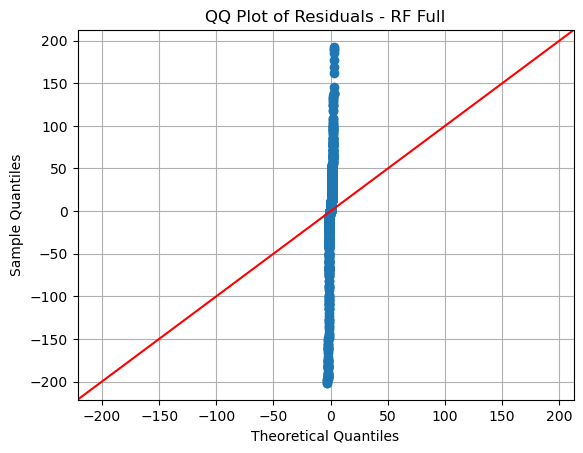

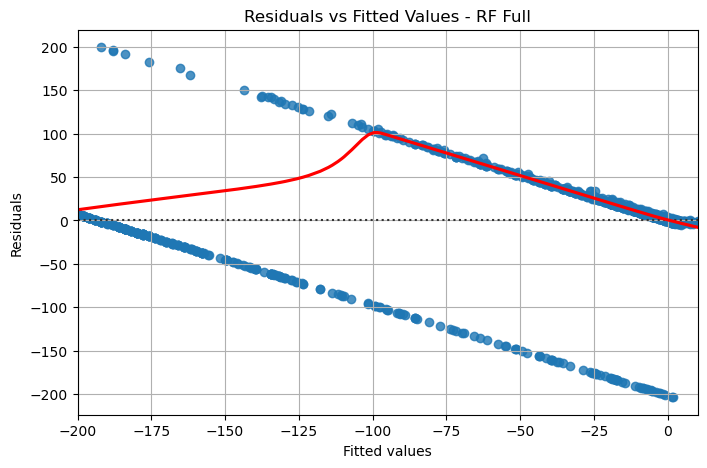

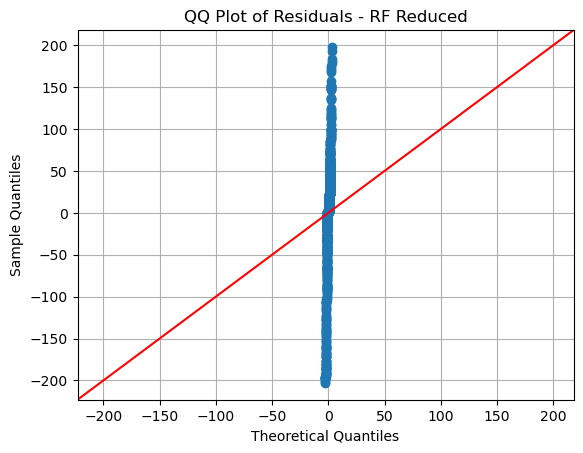

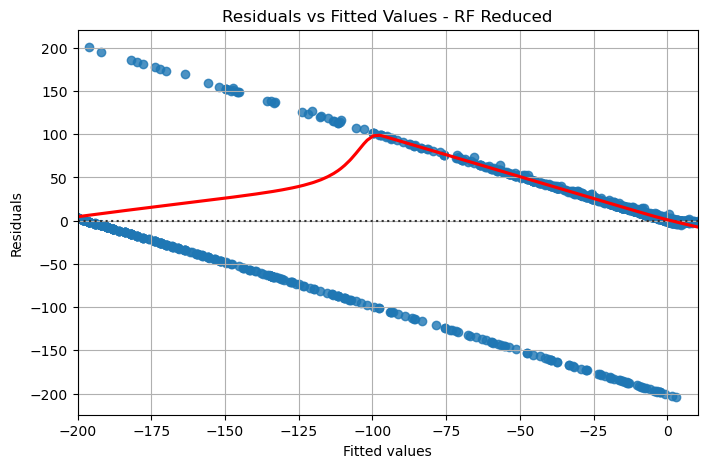

({'RF Full Shapiro-Wilk (W, p)': (0.7111064493360082, 5.965647302923372e-49),
  'RF Full Levene Test (W, p)': (463.4345505301053, 5.152610175392954e-92),
  'RF Full Durbin-Watson Statistic': 2.016487134614597,
  'RF Full MSPE': 2071.668826698207},
 {'RF Reduced Shapiro-Wilk (W, p)': (0.7293088790777911,
   6.697713271341072e-48),
  'RF Reduced Levene Test (W, p)': (481.816119585437, 3.304337305958416e-95),
  'RF Reduced Durbin-Watson Statistic': 2.0325623839406175,
  'RF Reduced MSPE': 2278.2588299365425})

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro, levene
import statsmodels.api as sm

# Load the dataset
df = pd.read_excel(r'C:\Users\yoges\Data_Science_Preparation\STAT 5010 CU Boulder Statistical Methods And Applications II\Project\air+quality\AirQualityUCI.xlsx')
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.dropna(inplace=True)

# Define features
full_features = [col for col in df.columns if col != 'CO(GT)']
reduced_features = ['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'T', 'AH']
y = df['CO(GT)']

# Function to run RF, evaluate, and plot
def evaluate_random_forest(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    residuals = y_test - y_pred

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(residuals)

    # Levene’s Test
    median_pred = np.median(y_pred)
    group1 = residuals[y_pred <= median_pred]
    group2 = residuals[y_pred > median_pred]
    levene_stat, levene_p = levene(group1, group2)

    # Durbin-Watson
    dw_stat = sm.stats.durbin_watson(residuals)

    # MSPE
    mspe = mean_squared_error(y_test, y_pred)

    # QQ Plot
    sm.qqplot(residuals, line='45')
    plt.title(f'QQ Plot of Residuals - {label}')
    plt.grid(True)
    plt.show()

    # Residuals vs Fitted Plot
    plt.figure(figsize=(8, 5))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Fitted Values - {label}')
    plt.grid(True)
    plt.show()

    return {
        f'{label} Shapiro-Wilk (W, p)': (shapiro_stat, shapiro_p),
        f'{label} Levene Test (W, p)': (levene_stat, levene_p),
        f'{label} Durbin-Watson Statistic': dw_stat,
        f'{label} MSPE': mspe
    }

# Evaluate with full and reduced features
results_full = evaluate_random_forest(df[full_features], y, label='RF Full')
results_reduced = evaluate_random_forest(df[reduced_features], y, label='RF Reduced')

results_full, results_reduced
